# Which continent does this flag come from?

<img src="/Users/Ian/Desktop/Study/ComputerScience/Codecademy/Github Page/ML-Fundamentals/Supervised Learning/6 - Decision Trees/Images/where.jpg"/>(

### [Flags Dataset](https://archive.ics.uci.edu/ml/datasets/Flags)

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [7]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("Data/flag.data", names=cols)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


#### Input/Output features of interest

- `name`: Name of the country concerned
- `landmass`: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
- `bars`: Number of vertical bars in the flag
- `stripes`: Number of horizontal stripes in the flag
- `colours`: Number of different colours in the flag
- `red`: 0 if red absent, 1 if red present in the flag
…

- `mainhue`: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
- `circles`: Number of circles in the flag
- `crosses`: Number of (upright) crosses
- `saltires`: Number of diagonal crosses
- `quarters`: Number of quartered sections
- `sunstars`: Number of sun or star symbols

1. How many flags/countries on each continent?

1 = N. America, 2 = S. America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania

In [8]:
count_flags = df['landmass'].value_counts()
print(count_flags)

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64


2. Focus on Europe and Oceania

In [9]:
europe = df[df['landmass'] == 3]
oceania = df[df['landmass'] == 6]

In [10]:
print(F"Europe\nShape of df: {europe.shape}")
europe.head()

Europe
Shape of df: (35, 30)


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,0,black,red
26,Bulgaria,3,1,111,9,5,6,0,3,5,...,0,0,1,0,0,1,1,0,white,red


In [11]:
print(F"Oceania\nShape of df: {oceania.shape}")
oceania.head()

Oceania
Shape of df: (20, 30)


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
57,Fiji,6,2,18,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue
61,French-Polynesia,6,3,4,0,3,0,0,3,5,...,0,0,1,0,0,1,0,0,red,red


In [12]:
# Join the two dataframes
df_36 = pd.concat([europe, oceania])
df_36.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,0,black,red
26,Bulgaria,3,1,111,9,5,6,0,3,5,...,0,0,1,0,0,1,1,0,white,red


----
&nbsp;
#### List of predictors

In [13]:
#variable names to use as predictors
var = [ 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'bars', 'stripes', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'triangle', 'animate']

3. Average values of `var` for Europe and Oceania

In [14]:
av_values = df_36.groupby('landmass')[var].mean()
av_values

,red,green,blue,gold,white,black,orange,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
landmass,,,,,,,,,,,,,,,,
3,0.828571,0.2,0.514286,0.428571,0.771429,0.171429,0.057143,0.628571,1.285714,0.028571,0.285714,0.028571,0.028571,0.142857,0.028571,0.114286
6,0.800000,0.2,0.800000,0.600000,0.950000,0.150000,0.150000,0.000000,0.400000,0.150000,0.400000,0.300000,0.400000,3.300000,0.250000,0.300000


In [15]:
# Create labels for Europe and Oceania
labels = df_36['landmass']

# Print variable types
print(F"Variable types:\n\n{df[var].dtypes}")

Variable types:

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


`mainhue` is the only categorical variable $\in$ `var`

4. Transform to dummy variables

In [16]:
data = pd.get_dummies(df_36[var])

5. Split into train and test set

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.4, random_state=1)

----
&nbsp;
## Tune Decision Tree Classifiers by Depth

1. Test performance over a range of depth `max_depth` values

In [18]:
# Fit a decision tree classifier for `max_depth` values from 1-20
# save the accuracy score
depths = range(1,21)
acc_depth = list()
for depth in depths:
    dt = DecisionTreeClassifier(random_state=10, max_depth=depth)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

2. Plot the accuracy of the decision tree models vs. `max_depth`

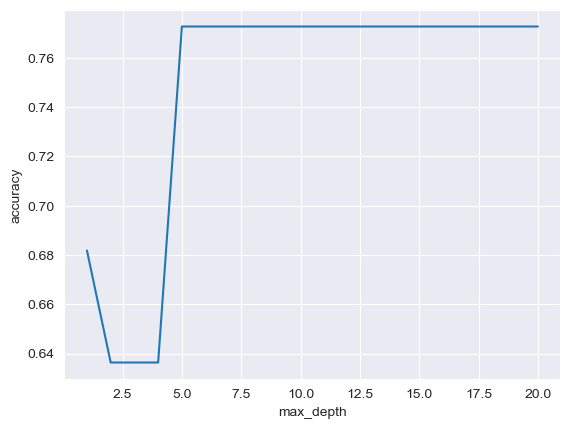

In [19]:
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [20]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 77.3% at depth 5


3. Refit the decision tree

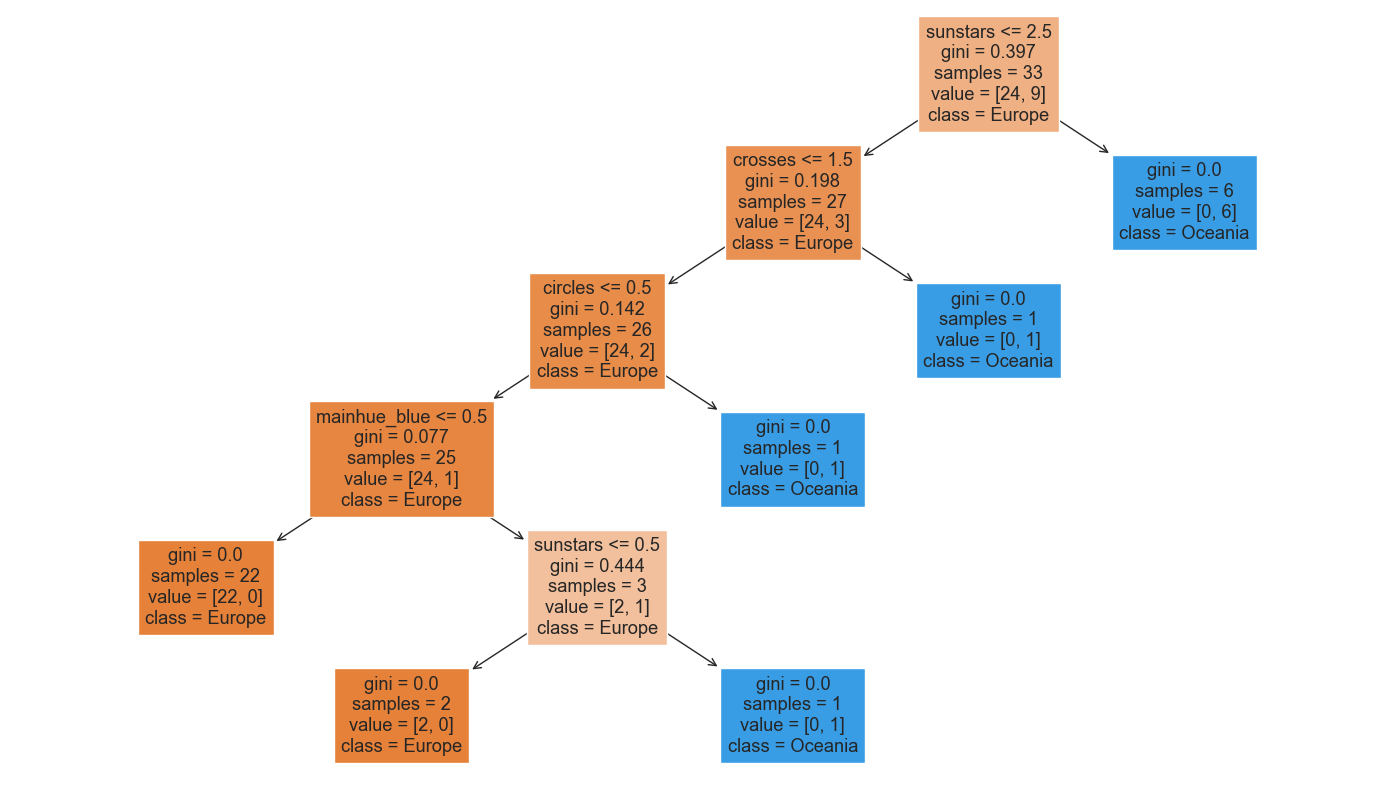

In [21]:
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state=1, max_depth=best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names=train_data.columns, class_names=['Europe', 'Oceania'], filled=True)
plt.tight_layout()
plt.show()

----
&nbsp;
## Tune Decision Tree Classifiers by Pruning

1. Tune tree using hyperparameter `ccp_alpha`

In [22]:
#Create a new list for the accuracy values of a pruned decision tree.

acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

2. Plot the accuracy of decision tree models vs. `ccp_alpha`

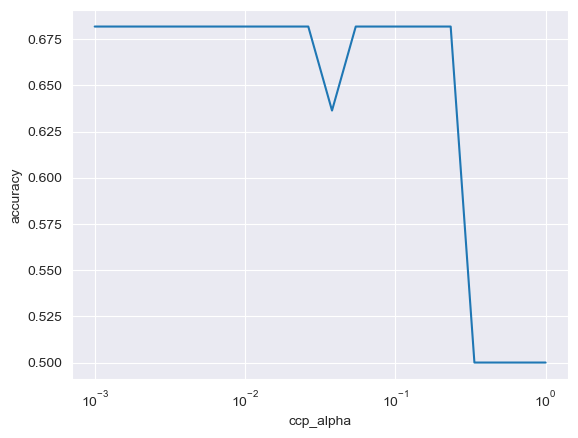

In [23]:
plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

3. Find largest accuracy and `ccp_value` this occurs

In [24]:
#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]
print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 68.2% at ccp_alpha 0.001


4. Fit final decision tree model

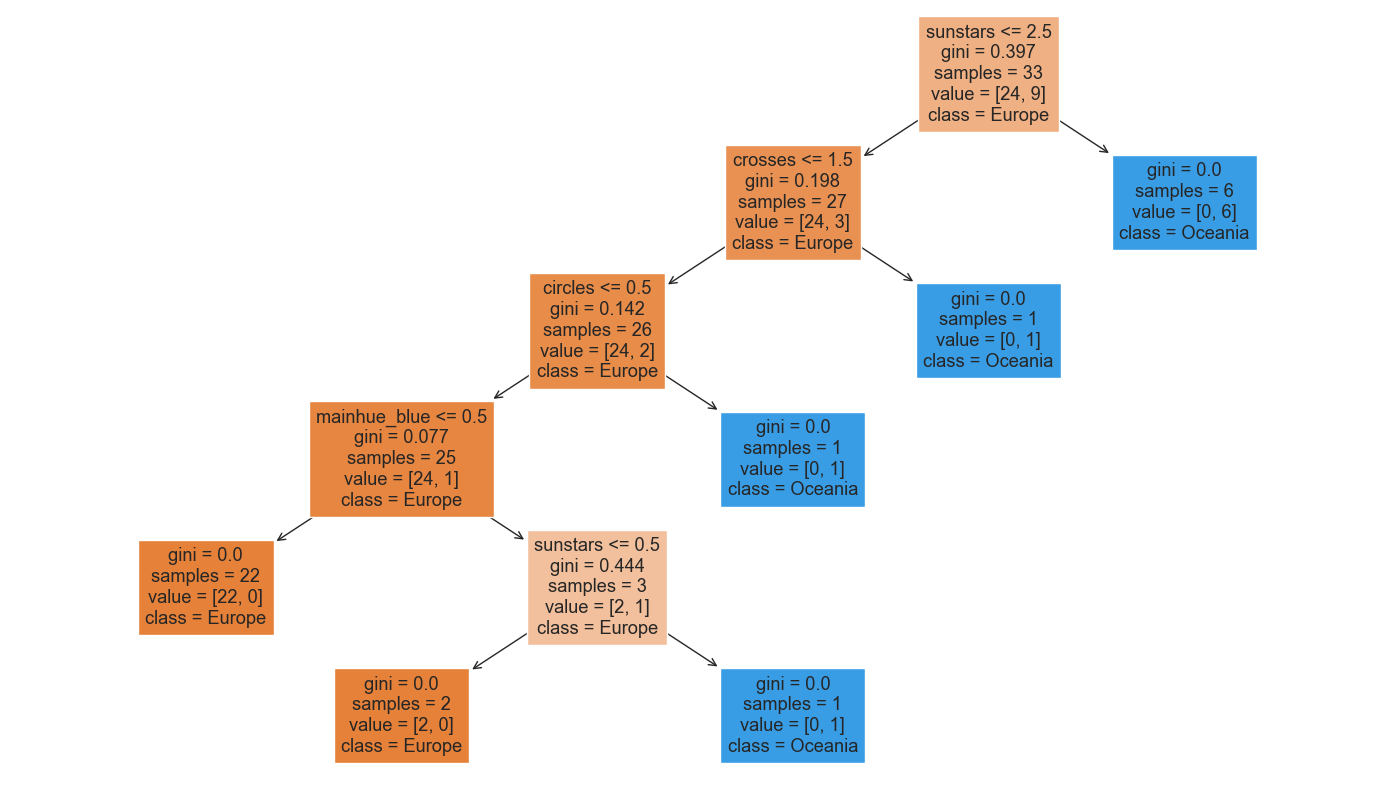

In [25]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)

#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns,
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.tight_layout()
plt.show()

# [sklearn.tree.DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)